In [1]:
import pandas as pd
from my_utils2 import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
url = 'http://openAPI.seoul.go.kr:8088/(인증키)/xml/TimeAverageAirQuality/1/100/20231226/종로구'

In [9]:
df = get_df(url)

In [11]:
df.drop(columns = 'MSRSTE_NM', inplace = True)

In [13]:
df.set_index('MSRDT', inplace= True)

Text(0.5, 1.0, '종로구 시간별 오염 수치')

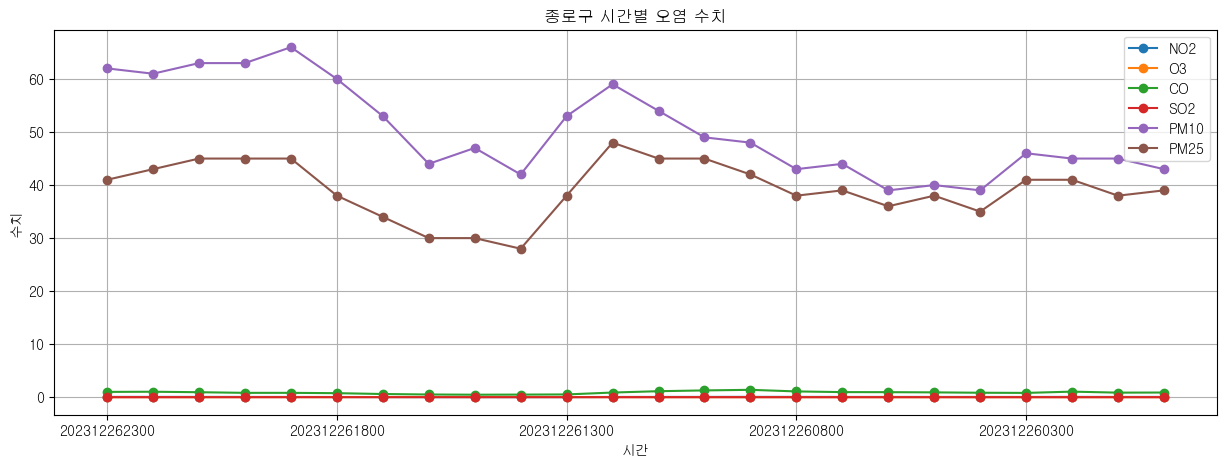

In [19]:
df.plot(figsize = (15, 5), legend = True, marker = 'o', rot = 0)
plt.grid(True)
plt.xlabel('시간')
plt.ylabel('수치')
plt.title('종로구 시간별 오염 수치')

In [21]:
tmp = df[['NO2', 'O3', 'SO2']]

Text(0.5, 1.0, '종로구 시간별 오염 수치')

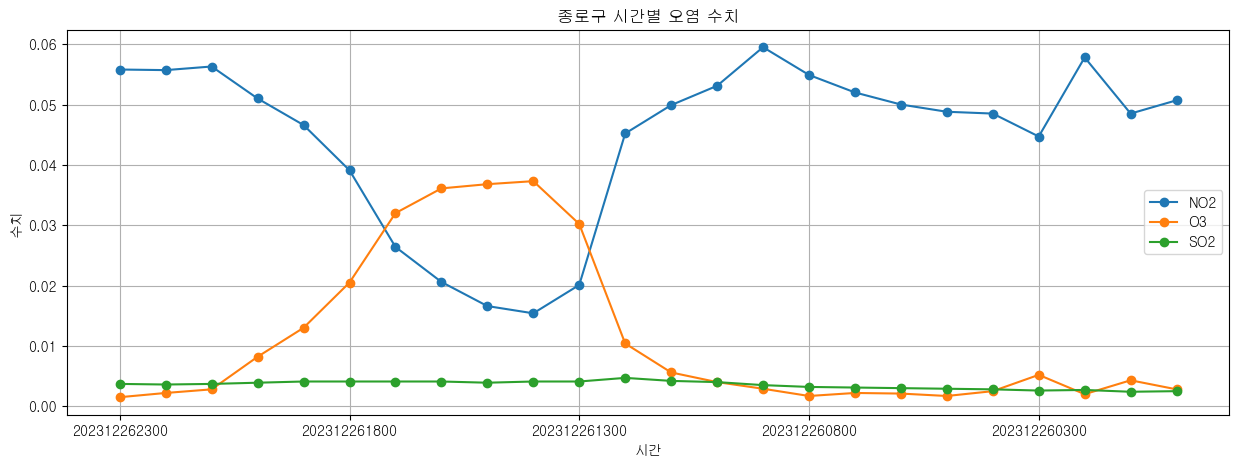

In [22]:
tmp.plot(figsize = (15, 5), legend = True, marker = 'o', rot = 0)
plt.grid(True)
plt.xlabel('시간')
plt.ylabel('수치')
plt.title('종로구 시간별 오염 수치')

In [23]:
xdata = df.NO2
ydata = df.PM10

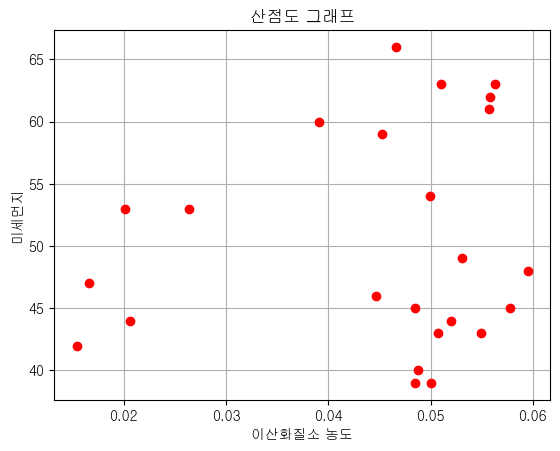

In [31]:
plt.figure()
plt.plot(xdata, ydata, color = 'r', marker = 'o', linestyle = 'None')
plt.xlabel('이산화질소 농도')
plt.ylabel('미세먼지')
plt.title('산점도 그래프')
plt.grid(True)

In [27]:
xdata = df.NO2
ydata = df.PM10
ydata2 = df.PM25

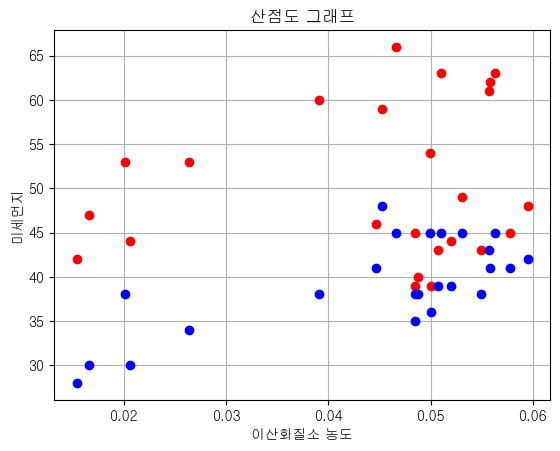

In [37]:
plt.figure()
plt.plot(xdata, ydata, color = 'r', marker = 'o', linestyle = 'None')
plt.plot(xdata, ydata2, color = 'b', marker = 'o', linestyle = 'None')
plt.xlabel('이산화질소 농도')
plt.ylabel('미세먼지')
plt.title('산점도 그래프')
plt.grid(True)

# 7시간 동안의 미세먼지에 따른 bar그래프 그리기

In [57]:
df = df[::-1]

In [58]:
df.reset_index(inplace=True)

In [59]:
x_data = df.MSRDT[:7]
y_data = df.PM10[:7]

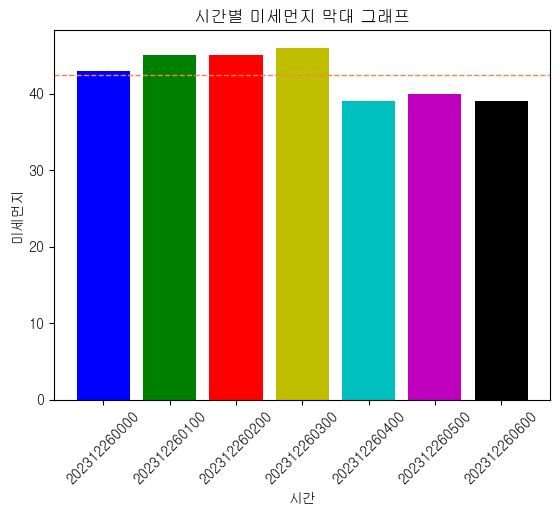

In [66]:
plt.figure()
plt.bar(x_data, y_data, color = ['b', 'g', 'r', 'y', 'c', 'm', 'k'])
plt.xticks(rotation = 45)
plt.xlabel('시간')
plt.ylabel('미세먼지')
plt.title('시간별 미세먼지 막대 그래프')

mean_val = df.PM10[:7].mean()
plt.axhline(y = mean_val, color = 'coral', linewidth = 1, linestyle = 'dashed')

(array([1., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 3., 2., 2., 1.,
        1., 1., 2., 1., 1., 1.]),
 array([0.0154   , 0.0165025, 0.017605 , 0.0187075, 0.01981  , 0.0209125,
        0.022015 , 0.0231175, 0.02422  , 0.0253225, 0.026425 , 0.0275275,
        0.02863  , 0.0297325, 0.030835 , 0.0319375, 0.03304  , 0.0341425,
        0.035245 , 0.0363475, 0.03745  , 0.0385525, 0.039655 , 0.0407575,
        0.04186  , 0.0429625, 0.044065 , 0.0451675, 0.04627  , 0.0473725,
        0.048475 , 0.0495775, 0.05068  , 0.0517825, 0.052885 , 0.0539875,
        0.05509  , 0.0561925, 0.057295 , 0.0583975, 0.0595   ]),
 <BarContainer object of 40 artists>)

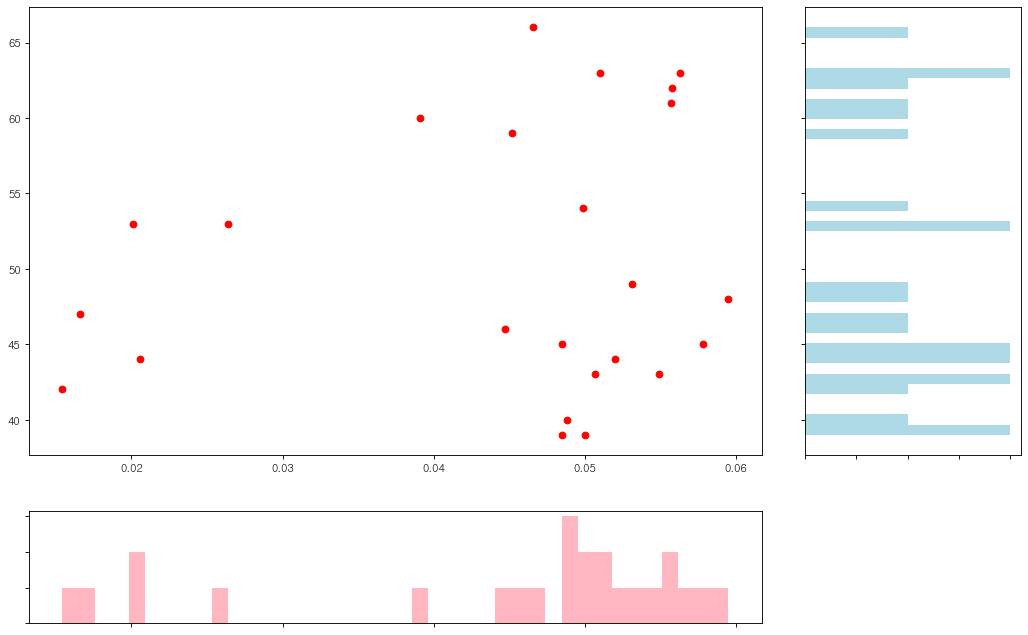

In [70]:
fig = plt.figure(figsize = (16, 10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace= 0.5, wspace= 0.20)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

ax_main.scatter('NO2', 'PM10', color = 'r', data = df)
ax_right.hist(df.PM10, 40, orientation = 'horizontal', color = 'lightblue')
ax_bottom.hist(df.NO2, 40, orientation = 'vertical', color = 'lightpink')

In [71]:
conn = connect_mysql()

In [72]:
query = 'select * from lol_datas'

In [73]:
lol_df = pd.DataFrame(sql_execute_dict(conn, query))

In [75]:
my_df = lol_df[lol_df.gameId == 'KR_6622380599']

In [77]:
my_df.set_index('championName', inplace=True)

In [81]:
damage = my_df['totalDamageDealtToChampions']

In [83]:
damage

championName
Poppy     16199
Viego     12057
Azir      11248
Xayah     12248
Rell       4006
Aatrox    12365
LeeSin     2743
Irelia    11462
Zeri       6957
Senna      7752
Name: totalDamageDealtToChampions, dtype: int64

In [86]:
import numpy as np

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Poppy'),
  Text(1, 0, 'Viego'),
  Text(2, 0, 'Azir'),
  Text(3, 0, 'Xayah'),
  Text(4, 0, 'Rell'),
  Text(5, 0, 'Aatrox'),
  Text(6, 0, 'LeeSin'),
  Text(7, 0, 'Irelia'),
  Text(8, 0, 'Zeri'),
  Text(9, 0, 'Senna')])

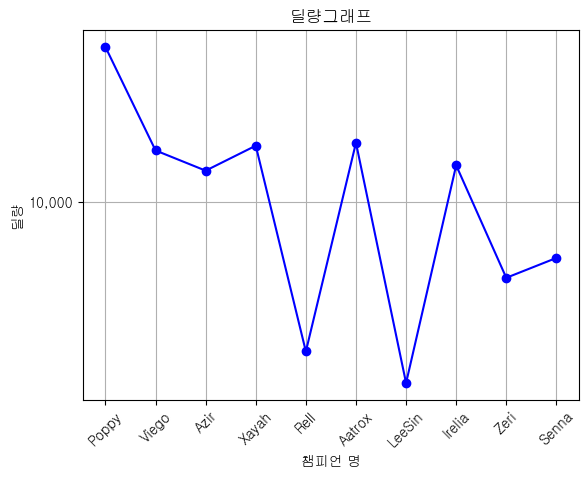

In [91]:
yticks_interval = 10000
maxlim = int((damage.max() / yticks_interval + 1)) * yticks_interval
values= np.arange(0, maxlim + 1, yticks_interval)
plt.yticks(values, ['%s' % format(val, ',') for val in values])

plt.plot(damage, color = 'blue', marker = 'o')
plt.grid(True)
plt.title('딜량그래프')
plt.xlabel('챔피언 명')
plt.ylabel('딜량')
plt.xticks(rotation = 45)

In [100]:
tmp_df = lol_df[['teamPosition','totalDamageDealtToChampions','totalDamageTaken','g_15']]

In [101]:
tmp_df2 = tmp_df[tmp_df.teamPosition != '']

In [103]:
tmp_df2

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,TOP,16199,12908,6212
1,JUNGLE,12057,16026,6931
2,MIDDLE,11248,11933,5674
3,BOTTOM,12248,6739,6182
4,UTILITY,4006,9176,4731
...,...,...,...,...
32537,TOP,12203,15585,5269
32538,JUNGLE,11059,24062,5586
32539,MIDDLE,14036,21451,5039
32540,BOTTOM,17547,14429,6572


In [104]:
jungle_df = tmp_df2[tmp_df2.teamPosition == 'JUNGLE']

In [105]:
jungle_df

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
1,JUNGLE,12057,16026,6931
6,JUNGLE,2743,14487,4536
11,JUNGLE,17102,33892,6418
16,JUNGLE,19792,28912,5971
21,JUNGLE,10523,34747,5077
...,...,...,...,...
32518,JUNGLE,8863,27348,5217
32523,JUNGLE,10249,28646,4574
32528,JUNGLE,13107,21707,6584
32533,JUNGLE,21401,28212,8210


In [120]:
xdata = jungle_df.g_15
ydata = jungle_df.totalDamageDealtToChampions
ydata2 = jungle_df.totalDamageTaken

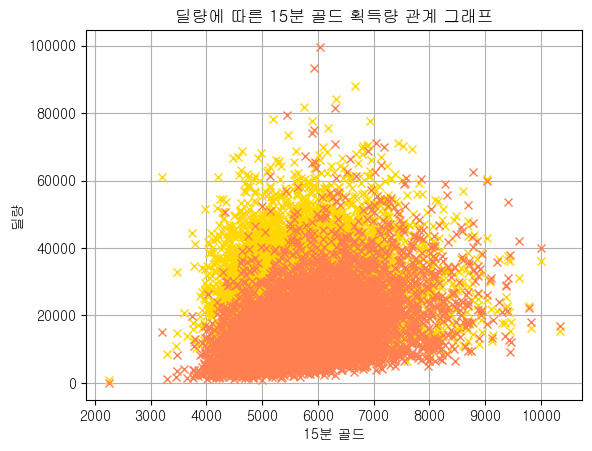

In [140]:
plt.figure()
plt.plot(xdata, ydata2, color = 'gold', marker = 'x', linestyle = 'None')
plt.plot(xdata, ydata, color = 'coral', marker = 'x', linestyle = 'None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('딜량에 따른 15분 골드 획득량 관계 그래프')
plt.grid(True)

In [149]:
group_df = tmp_df2.groupby('teamPosition').mean().round().reset_index()

In [147]:
group_df

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,BOTTOM,21102.0,18478.0,6005.0
1,JUNGLE,16827.0,29502.0,5864.0
2,MIDDLE,20881.0,21391.0,5721.0
3,TOP,19985.0,27314.0,5493.0
4,UTILITY,10112.0,17672.0,4193.0


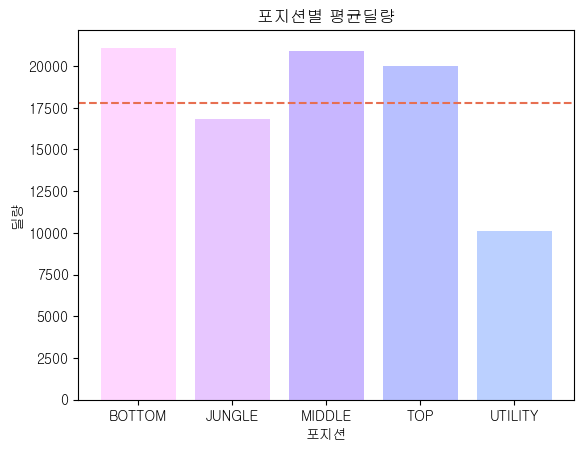

In [154]:
plt.figure()
plt.bar(group_df.teamPosition, group_df.totalDamageDealtToChampions, color = ['#ffd6ff', '#e7c6ff', '#c8b6ff', '#b8c0ff', '#bbd0ff'])
plt.xlabel('포지션')
plt.ylabel('딜량')
plt.title('포지션별 평균딜량')

mean_val = group_df.totalDamageDealtToChampions.mean()
plt.axhline(y = mean_val, color = '#e76f51', linestyle = 'dashed')